In [3]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr
from netCDF4 import Dataset

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Disable warnings for data download via API
import urllib3 
urllib3.disable_warnings()

In [9]:
ds = xr.open_dataset('c:\\Users\\Marcelo\\Documents\\projects\\REDE\\ERA5\\RotinasMarceloDilelo_mod\\DATA\\ERA5_Teste2024\\MSL_Y2024M1.nc')

C:\Users\Marcelo\anaconda3\lib\site-packages\xarray\coding\times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\Marcelo\anaconda3\lib\site-packages\xarray\core\indexing.py:535: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [11]:
ds1 = xr.open_dataset('c:\\Users\\Marcelo\\Documents\\projects\\REDE\\ERA5\\RotinasMarceloDilelo_mod\\DATA\\ERA5_native_Teste2024\\ERA5_ecmwf_MSL_Y2024M01.nc')

In [12]:
ds1

<xarray.Dataset>
Dimensions:     (valid_time: 744, latitude: 25, longitude: 21)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2024-01-01 ... 2024-01-31T23:00:00
  * latitude    (latitude) float64 -16.0 -16.25 -16.5 ... -21.5 -21.75 -22.0
  * longitude   (longitude) float64 -41.0 -40.75 -40.5 ... -36.5 -36.25 -36.0
    expver      (valid_time) object ...
Data variables:
    msl         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-14T23:49 GRIB to CDM+CF via cfgrib-0.9.1...

In [18]:
ds1.attrs['units'] = 'Pa'

In [19]:
dsp = ds1['msl']

In [20]:
dsp.attrs['units'] = 'Pa'

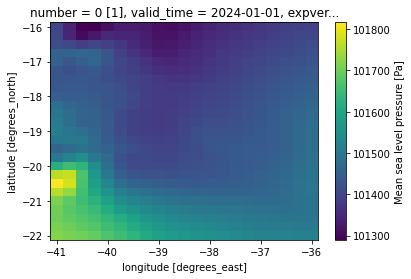

In [29]:
dsp[0,:,:].plot()

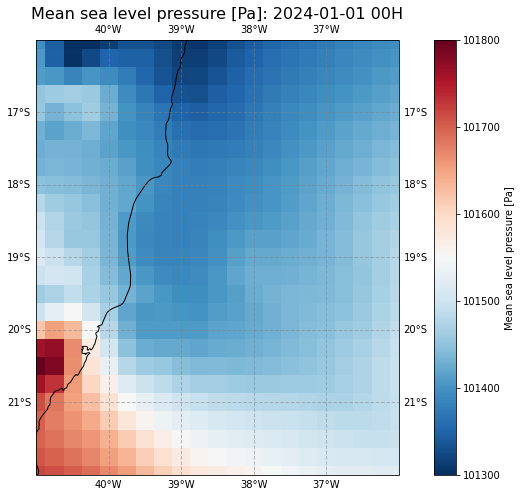

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

im = plt.pcolormesh(dsp.longitude, dsp.latitude, dsp[0,:,:], cmap='RdBu_r', vmin=101300, vmax=101800) 

ax.set_title('Mean sea level pressure [Pa]: 2024-01-01 00H', fontsize=16)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
ax.coastlines(color='black')
ax.set_extent([-41, -36, -22, -16], crs=ccrs.PlateCarree())

cbar = plt.colorbar(im,fraction=0.05, pad=0.04)
cbar.set_label('Mean sea level pressure [Pa]') 

#fig.savefig(f'{DATADIR}ERA5_Europe_2020-08_anomaly.png')

In [26]:
dsp[0,:,:]

<xarray.DataArray 'msl' (latitude: 25, longitude: 21)>
[525 values with dtype=float32]
Coordinates:
    number      int64 ...
    valid_time  datetime64[ns] 2024-01-01
  * latitude    (latitude) float64 -16.0 -16.25 -16.5 ... -21.5 -21.75 -22.0
  * longitude   (longitude) float64 -41.0 -40.75 -40.5 ... -36.5 -36.25 -36.0
    expver      object ...
Attributes: (12/32)
    GRIB_paramId:                             151
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      525
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               Pa
    long_name:                                Mean sea level pressure
    units:                                    Pa
    standard_name:                            air_pressure_at_mean_sea_level
    GRIB_surface:                             0.0